In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB

In [ ]:
dataset = pd.read_csv("/content/Logistic_Iris.csv")
print(dataset)

     Sepal Length  Sepal Width  Petal Length  Petal Width         Species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [ ]:
x = dataset.iloc[:,[0,1,2,3]].values
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
y = dataset.iloc[:,4].values
print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [ ]:
#Splitting tain and test sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25,random_state=0)

#Feature scaling
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

#Fitting Naive Bayes to the training set
classifier = GaussianNB()
classifier.fit(xtrain, ytrain)

GaussianNB()

In [ ]:
#predicting the test set labels
y_pred1 = classifier.predict(xtest)
print("Predicted values: \n",y_pred1)

Predicted values: 
 ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor']


In [ ]:
acc1 = accuracy_score(ytest, y_pred1)*100
print("Accuracy using Gaussian Naive Bayes Classifier: ",acc1)

Accuracy using Gaussian Naive Bayes Classifier:  100.0


In [ ]:
cm1 = confusion_matrix(ytest, y_pred)
print("Confusion Matrix: \n",cm1)

Confusion Matrix: 
 [[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


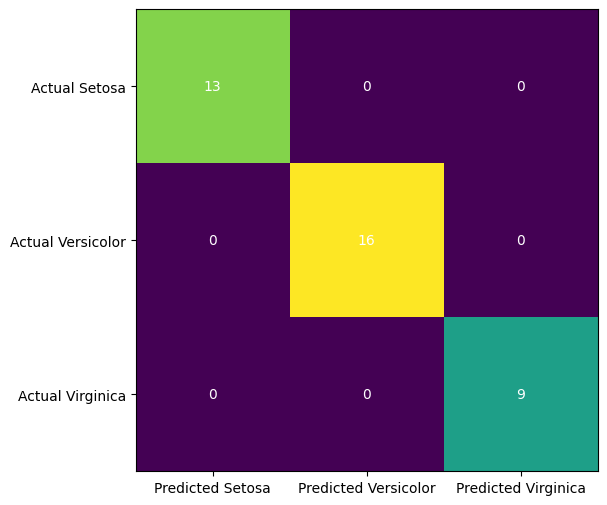

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))
ax.imshow(cm1)
ax.grid(False)
ax.xaxis.set(ticks=(0,1,2), ticklabels=("Predicted Setosa", "Predicted Versicolor", "Predicted Virginica"))
ax.yaxis.set(ticks=(0,1,2), ticklabels=("Actual Setosa", "Actual Versicolor", "Actual Virginica"))
ax.set_ylim(2.5, -0.5)
for i in range(3):
  for j in range(3):
    ax.text(j,i,cm1[i,j],ha="center",va="center",color="white")
plt.show()

In [ ]:
dataset2 =  pd.read_csv("/content/Logistic_car_data.csv")
print(dataset2)

     User ID  Gender  Age  AnnualSalary  Purchased
0        385    Male   35         20000          0
1        681    Male   40         43500          0
2        353    Male   49         74000          0
3        895    Male   40        107500          1
4        661    Male   25         79000          0
..       ...     ...  ...           ...        ...
995      863    Male   38         59000          0
996      800  Female   47         23500          0
997      407  Female   28        138500          1
998      299  Female   48        134000          1
999      687  Female   44         73500          0

[1000 rows x 5 columns]


In [ ]:
x2 = dataset2.iloc[:,[2,3]].values
print(x2)

[[    35  20000]
 [    40  43500]
 [    49  74000]
 ...
 [    28 138500]
 [    48 134000]
 [    44  73500]]


In [ ]:
y2 = dataset2.iloc[:,4].values
print(y2)

[0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0
 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0
 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1
 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1
 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0
 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0
 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0
 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1
 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1
 0 0 0 0 1 0 1 1 1 0 0 1 

In [ ]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x2, y2, test_size=0.25,random_state=78) #rs=78->89.6% 34->88% 23->89.2%

xtrain2 = sc.fit_transform(xtrain2)
xtest2 = sc.transform(xtest2)

classifier.fit(xtrain2, ytrain2)

GaussianNB()

In [ ]:
y_pred2 = classifier.predict(xtest2)
print("Predicted values: \n",y_pred2)

Predicted values: 
 [1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1
 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0
 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0
 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0]


In [ ]:
acc2 = accuracy_score(ytest2, y_pred2)*100
print("Accuracy using Gaussian Naive Bayes Classifier: ",acc2)

Accuracy using Gaussian Naive Bayes Classifier:  89.60000000000001


In [ ]:
cm2 = confusion_matrix(ytest2, y_pred2)
print("Confusion Matrix: \n",cm2)

Confusion Matrix: 
 [[144   9]
 [ 18  79]]


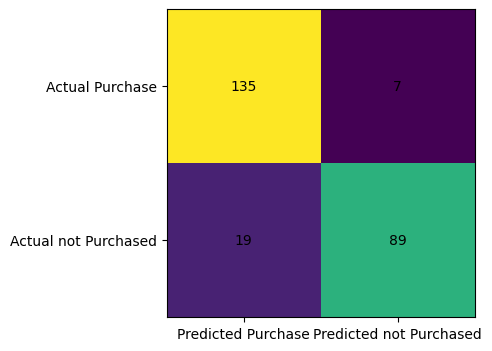

In [ ]:
fig, ax = plt.subplots(figsize = (4,4))
ax.imshow(cm2)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=("Predicted Purchase", "Predicted not Purchased"))
ax.yaxis.set(ticks=(0,1), ticklabels=("Actual Purchase", "Actual not Purchased"))
ax.set_ylim(1.5, -0.5)
for i in range(2):
  for j in range(2):
    ax.text(j,i,cm2[i,j],ha="center",va="center",color="black")
plt.show()

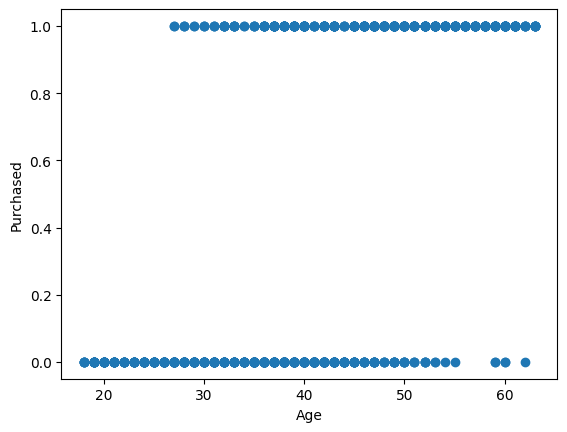

In [ ]:
x_2 = dataset2.iloc[:,2].values
plt.scatter(x_2,y2)
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.show()

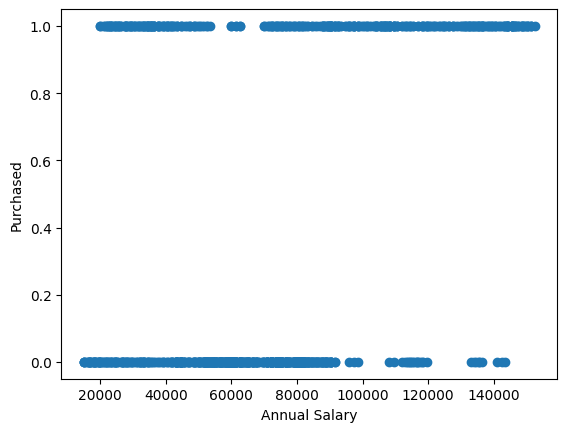

In [ ]:
x_3 = dataset2.iloc[:,3].values
plt.scatter(x_3,y2)
plt.xlabel('Annual Salary')
plt.ylabel('Purchased')
plt.show()